# Contents
- Logistic Regression using Perceptron
- Logistic Regression using Sklearn or scikit learn
- Problem in the perceptron
  - Difference between the logistic regression of [scikit vs perceptron].
- Solution of the problem in perceptron
- Logistic Regression using Sigmoid Function
- Problem in the Sigmoid Approach
- Solution of this Sigmoid Approach
- Loss Function in Non-Matrix Form
- Loss Function in Matrix Form
- Gradient Descent Formula
- Gradient Descent Implementation

# Logistic Regression Using Perceptron

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 10)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (100, 2)
Shape of y:  (100,)


In [18]:
print("Values of X (Input Values): ")
print(X)
print()
print("Values of y (Output Values): ")
print(y)

Values of X (Input Values): 
[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.8394709 ]

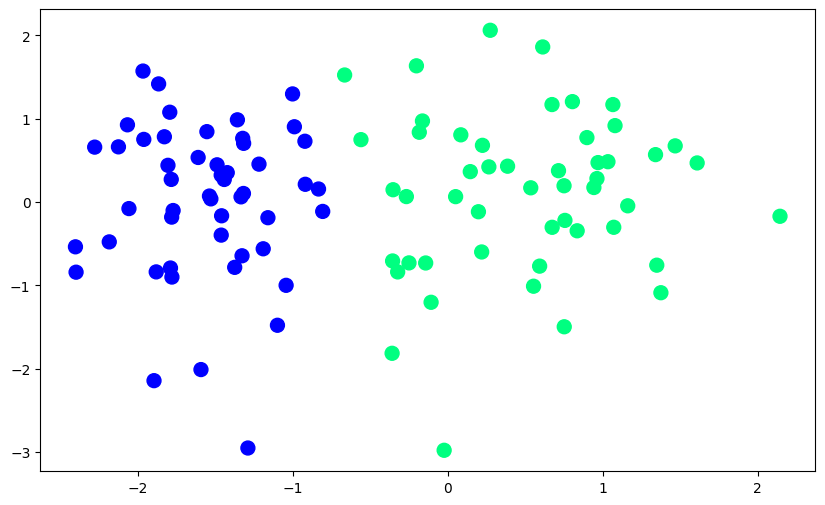

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)

It is a two dimensional data.

Encoding:
* 0 : Blue
* 1 : Green

In [20]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(1000):
    j = np.random.randint(0, 100)
    y_hat = step(np.dot(X[j], weights))
    weights = weights + lr * (y[j] - y_hat) * X[j]
  return weights[0], weights[1:]

In [21]:
def step(z):
  return 1 if z > 0 else 0

In [22]:
intercept, coefficients = perceptron(X, y)

In [23]:
print("Intercept: ", intercept)
print("Coefficients: ", coefficients)

Intercept:  0.9
Coefficients:  [1.41969804 0.14647576]


In [24]:
m = -(coefficients[0] / coefficients[1])
b = -(intercept / coefficients[1])

In [25]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

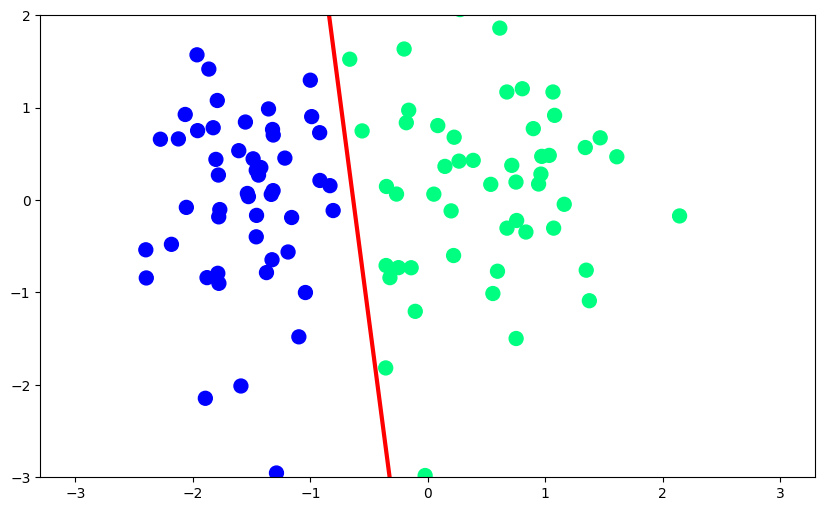

In [36]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'r', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

This is good looking line.


# Logistic Regression Using sklearn

In [27]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [28]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])
print("Value of m is: ", m)
print("value of b is: ", b)

Value of m is:  -126.2470635231025
value of b is:  [-81.16386951]


In [29]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input + b

### Plotting the Logistic Regressions [scikit vs perceptron]

(-3.0, 2.0)

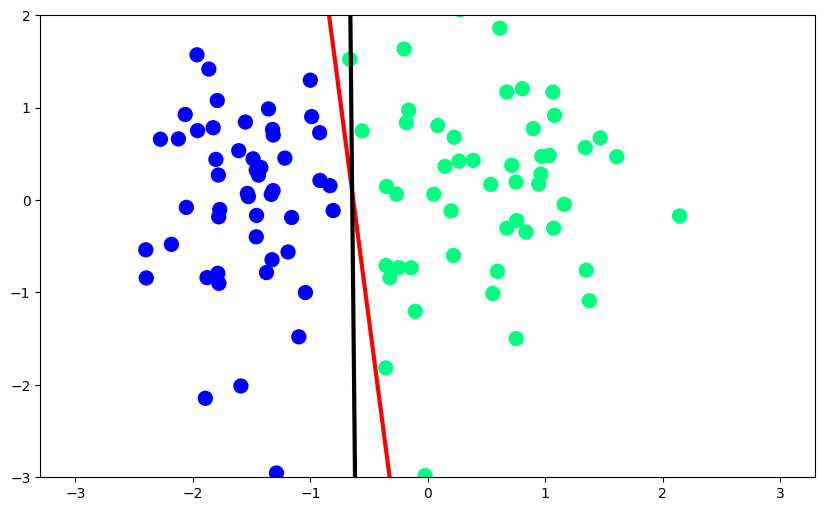

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3, label = 'Perceptron')
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3, label = 'scikit-learn')
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

## Problem in the Perceptron

## Difference between Logistic Regression [scikit vs perceptron]

### LOR : scikit is way better than the perceptron

There is a problem in the perceptron. In this we use to run a loop till the `n` epochs and then we select a random point and we ask to that random point if he is misclassified or not, if that point is misclassified then we move the best fit line, if that point is not misclassified then we aren't performing any operation on the line. At the end, our solution have converges accurately and classify all the classes at a good solution.

And then we have a scikit learn Logistic Regression and we compare Logistic Regression line with our perceptron through which we can see a clear difference that the scikit-line is performing well than our perceptron.

The flaw is in our algorithm that we are performing that when we have no misclassified point, then we do not perform anything. We have to change something here so that it can atleast do perform close to sklearn line.

## Solution of the problem in perceptron

We will change the current algorithm. We say that we will not perform anything when we got a point that is classified correctly or that is not misclassified. There was only thing we were changing the line to those points are misclassified. Now we are changing approach.

New Aprroach is: The correctly classified point will throw the line away from them.

- Misclassified: Line Pull
- Correctly Classified: Line Push

Remember, sometimes the line will be pushed too much so that the other points will also push on the other hand, to make them equilibrium.

There will be the second change that instead of the step function we will use the sigmoid function.

As the step function lies in between [0,1] and the biggest drawback was this gives the result either 0 or 1. That is when the result comes to negative the answer will be 0 and when the result comes to positive the answer will be 1.

As in the sigmoid function it lies in between the [-infinity, +infinity]. The biggest advantage is that it gives the result in the range of the 0 and 1. This means that the result can never be exactly 0 and nor be exactly 1. It can come close to them however not exactly.

### Summarize the solution
- Classified points will push the best fit line away from themselves.
- Misclassified points will pull the best fit line towards themselves.
- Instead of the step function we will use the sigmoid function.

## Logistic Regression using Sigmoid Function

In [41]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(1000):
    j = np.random.randint(0, 100)
    y_hat = sigmoid(np.dot(X[j], weights))
    weights = weights + lr * (y[j] - y_hat) * X[j]
  return weights[0], weights[1:]

In [42]:
def sigmoid(z):
  return (1/(1 + np.exp(-z)))

In [43]:
intercept, coefficients = perceptron(X, y)

In [44]:
print("Intercept: ", intercept)
print("Coefficients: ", coefficients)

Intercept:  2.703787144856106
Coefficients:  [4.48909061e+00 3.45010345e-03]


In [45]:
m = -(coefficients[0] / coefficients[1])
b = -(intercept / coefficients[1])

In [46]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m * x_input2 + b

(-3.0, 2.0)

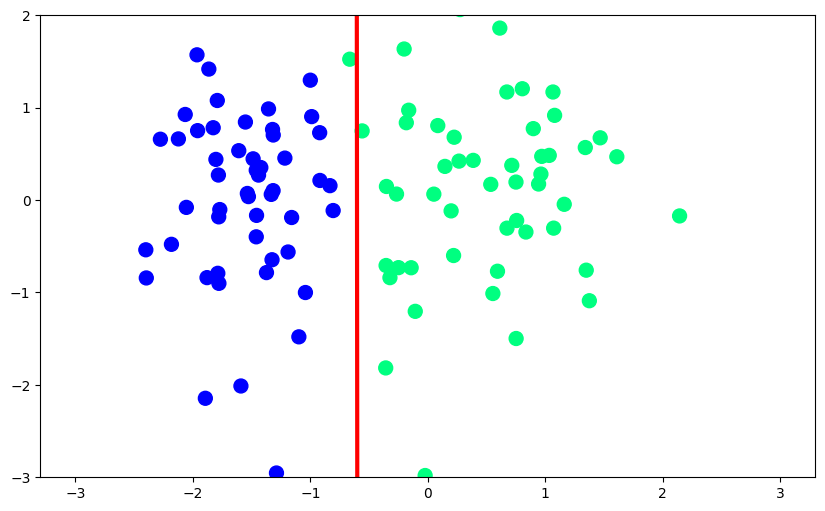

In [47]:
plt.figure(figsize = (10, 6))
plt.plot(x_input2, y_input2, color = 'r', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

## Comaparing all three approaches of Logistic Regression[perceptron vs scikit vs sigmoid]

(-3.0, 2.0)

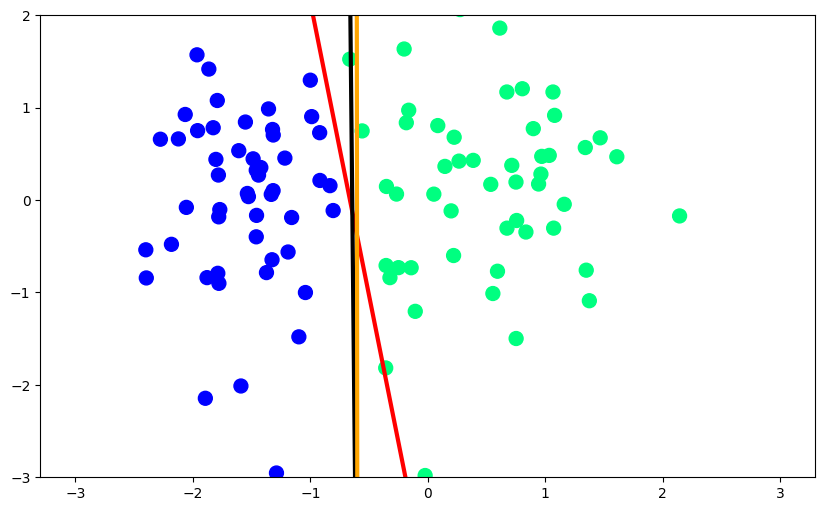

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3, label = 'Perceptron')
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3, label = 'scikit-learn')
plt.plot(x_input2, y_input2, color = 'orange', linewidth = 3, label = 'sigmoid')
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

## Problem in the Sigmoid Approach
Here, you can see there are a lot of things happening we have 3 lines of best fit, however each of them shows very differently.

As we are selecting the random points and from that point we are concluding that we got the best fit line however it isn't perfectly surable that this line is the only best fit line or the line which we have got is perfect for our classification or prediction.

## Solution of this Sigmoid Approach
The thing we will use is the Loss function. Concept that we will use to derive the loss function is: Maximum Likelihood.

Maximum Likelihood say that to find out the best model mathematically we have to multiply the probabilities of all the data points to each other and the model whose product will be greater than others will be the best model.

**NOTE**: The summation of the negative logarithms of maximum likelihood is called cross entropy.

## Loss Function in Non-Matrix Form

$$
\mathcal{Loss Function} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(y_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$


## Loss Function in Matrix Form

$$
\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y \log(\sigma(XW)) + (1 - Y) \log(1 - \sigma(XW)) \right]
$$

## Gradient Descent Formula

$$
W = W + \eta \cdot \frac{1}{m} (Y - \hat{Y}) X
$$

## Gradient Descent Implementation

In [51]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 10)
import matplotlib.pyplot as plt

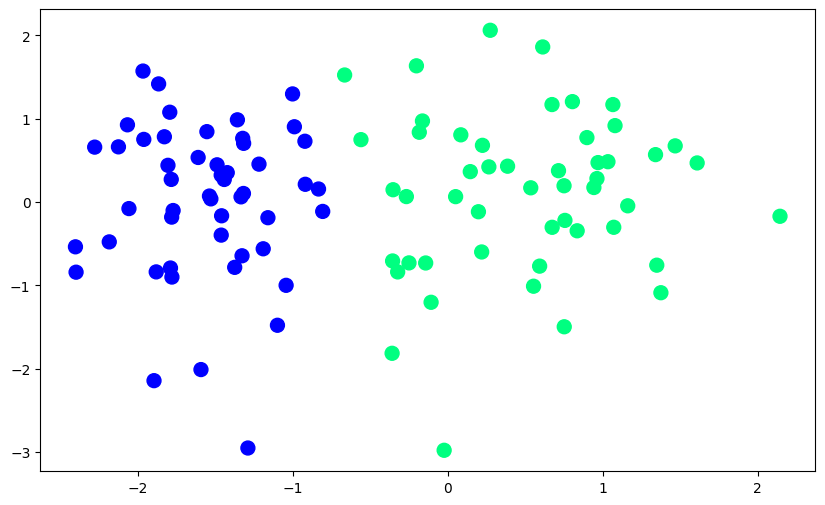

In [52]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [54]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty = None, solver = 'sag')
lor.fit(X, y)
print("Coefficient: " ,lor.coef_)
print("Intercept: ", lor.intercept_)

Coefficient:  [[13.46526188  0.98684789]]
Intercept:  [8.92558636]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [56]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [57]:
X_input = np.linspace(-3, 3, 100)
Y_input = m1 * X_input + b1

In [62]:
# This is usually a Batch Gradient Descent
def GradientDescent(X,y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.5
  for i in range(2500):
    y_hat = sigmoid(np.dot(X, weights))
    weights = weights + lr * (np.dot((y-y_hat), X) / X.shape[0])
  return weights[0], weights[1:]

In [63]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [64]:
intercept_, coef_ = GradientDescent(X,y)

In [65]:
print("Intercept: ", intercept_)
print("Coefficient: ", coef_)

Intercept:  6.371760288904529
Coefficient:  [9.64369151 0.5373282 ]


In [66]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [67]:
X_input1 = np.linspace(-3, 3, 100)
Y_input1 = m * X_input1 + b

(-3.0, 2.0)

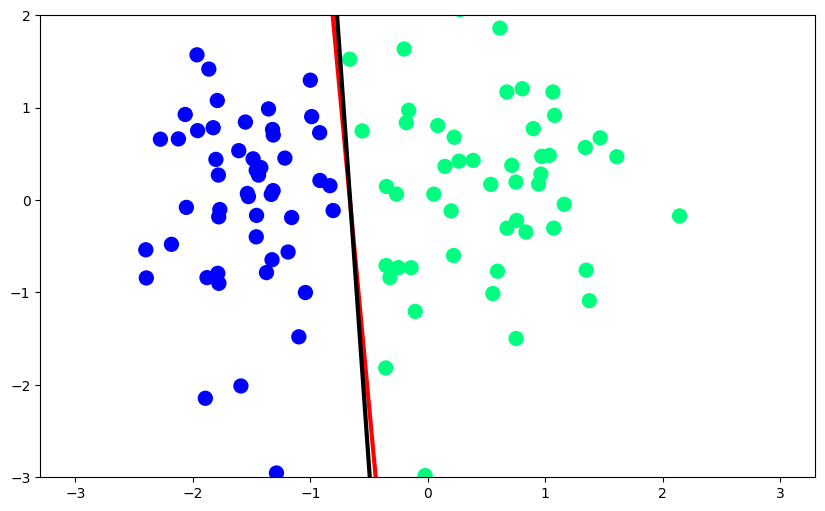

In [69]:
plt.figure(figsize = (10,6))
plt.plot(X_input, Y_input, color = 'red', linewidth = 3)
plt.plot(X_input1, Y_input1, color = 'black', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)